# First Model-on 11GB Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import keras
from PIL import Image, ImageOps

Using TensorFlow backend.


Define a path function so all members in the group can use this code. Just change the USER variable.

In [2]:
USER = "Alex"

if USER == "Gabi":
    PATH = "TBD"
elif USER == "Alex":
    PATH = "C:/Users/Pedro/Desktop/CheXpert-v1.0-small"
elif USER == "Vita":
    PATH = "TBD"
else:
    PATH = input("What is the path to the CheXpert data set?")

Load the dataframe and clean/process the data

In [3]:
df = pd.read_csv(PATH + "/train.csv")
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


C:/Users/Pedro/Desktop/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg


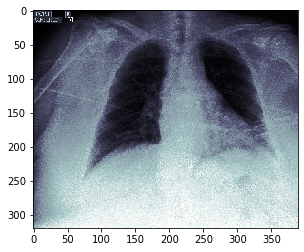

In [4]:
# Function for editing the image file paths
def edit_urls(url):
    pieces = url.split("/")
    newurl = ""
    
    #removing the previous path "CheXpert-v1.0-small" and including PATH
    for i, piece in enumerate(pieces):
        if i > 0:
            newurl += "/" + piece
        elif i == 0:
            newurl += PATH
    
    return newurl

#testing
tester_url = edit_urls(df.iloc[0]["Path"])
print(tester_url)

xray = Image.open(tester_url)
plt.imshow(xray, cmap = "bone")
plt.show()

In [5]:
remove_NaN_df = df.fillna(value = 0)
remove_NaN_df["Path"] = remove_NaN_df["Path"].apply(edit_urls)

remove_NaN_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
U_Ones_df = remove_NaN_df.replace(-1, 1)
U_Zeros_df = remove_NaN_df.replace(-1, 0)

U_Ones_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
U_Ones_PA_df_temp = U_Ones_df[(U_Ones_df["Frontal/Lateral"] == "Frontal") & (U_Ones_df["AP/PA"] == "PA")]
U_Ones_AP_df_temp = U_Ones_df[(U_Ones_df["Frontal/Lateral"] == "Frontal") & (U_Ones_df["AP/PA"] == "AP")]
U_Ones_lateral_df_temp = U_Ones_df[U_Ones_df["Frontal/Lateral"] == "Lateral"]

U_Ones_PA_df = U_Ones_PA_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
U_Ones_AP_df = U_Ones_AP_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
U_Ones_lateral_df = U_Ones_lateral_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

U_Ones_PA_df.head()

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
5,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create a list of the various pathologies (targets). This will come in handy later. 
pathologies = [col for col in U_Ones_PA_df.iloc[:, 1:].columns]
print(pathologies)

['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


In [9]:
print(len(U_Ones_PA_df))
print(len(U_Ones_AP_df))
print(len(U_Ones_lateral_df))

29420
161590
32387


Here we split the dataset into a training set and a test set. We are looking at frontal PA X-rays where uncertain values are classified as positive. 

In [10]:
# from sklearn.model_selection import train_test_split

# xray_train, xray_test, pathology_train, pathology_test = train_test_split(
#     U_Ones_PA_df["Path"], 
#     U_Ones_PA_df.iloc[:, 5:], 
#     test_size = 0.2, 
#     random_state = 42
# )

# print(xray_train.shape)
# print(pathology_train.shape)

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    U_Ones_PA_df,
    test_size = 0.2, 
    random_state = 42
)

print(train_df.shape)
print(test_df.shape)

(23536, 15)
(5884, 15)


Now we want to use ImageDataGenerator to process the x-rays into a format that the model can use.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize color information
datagen = ImageDataGenerator(rescale = 1./255)

# For the classifier to work, for some reason it has to be in string format
train_df[pathologies] = train_df[pathologies].astype(str)
test_df[pathologies] = test_df[pathologies].astype(str)

# print(train_df.dtypes)

train_generator = datagen.flow_from_dataframe(
    train_df,
    directory = None,
    x_col = "Path",
    y_col = "No Finding", # Change later as needed
    target_size = (256, 256), # 320 x 320 pixels
    color_mode = "grayscale",
    classes = None,
    class_mode = "binary",
    batch_size = 16,
    shuffle = True,
    seed = None,
    # save_to_dir='', 
    # save_prefix='test', 
    # save_format='png', 
    subset=None, 
    # interpolation='nearest', 
    drop_duplicates=True
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    directory = None,
    x_col = "Path",
    y_col = "No Finding", # Change later as needed
    target_size = (256, 256), # 320 x 320 pixels
    color_mode = "grayscale",
    classes = None,
    class_mode = "binary",
    batch_size = 16,
    shuffle = True,
    seed = None,
    # save_to_dir='', 
    # save_prefix='test', 
    # save_format='png', 
    subset=None, 
    # interpolation='nearest', 
    drop_duplicates=True
)

c:\users\pedro\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Found 23536 validated image filenames belonging to 2 classes.
Found 5884 validated image filenames belonging to 2 classes.


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (256, 256, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(2, activation = tf.nn.softmax)
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.train.AdamOptimizer(),
    metrics = ["accuracy"]
)

In [24]:
"""
Note for tomorrow: when the images are 320 x 320 pixels, the model overfits, as evidenced by 
large swings in the validation accuracy by epoch. 
"""

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 30,
    epochs = 5,
    validation_data = test_generator,
    validation_steps = 15
)

Epoch 1/5
30/30 [==============================] - 3s 113ms/step - loss: 3.0398 - acc: 0.7437 - val_loss: 6.9992 - val_acc: 0.8167
Epoch 2/5
30/30 [==============================] - 3s 100ms/step - loss: 3.2036 - acc: 0.7271 - val_loss: 2.1656 - val_acc: 0.8208
Epoch 3/5
30/30 [==============================] - 3s 94ms/step - loss: 2.3197 - acc: 0.7354 - val_loss: 3.5640 - val_acc: 0.8167
Epoch 4/5
30/30 [==============================] - 3s 94ms/step - loss: 2.0826 - acc: 0.7167 - val_loss: 3.0760 - val_acc: 0.8167
Epoch 5/5
30/30 [==============================] - 3s 94ms/step - loss: 2.0808 - acc: 0.7500 - val_loss: 3.3986 - val_acc: 0.8167


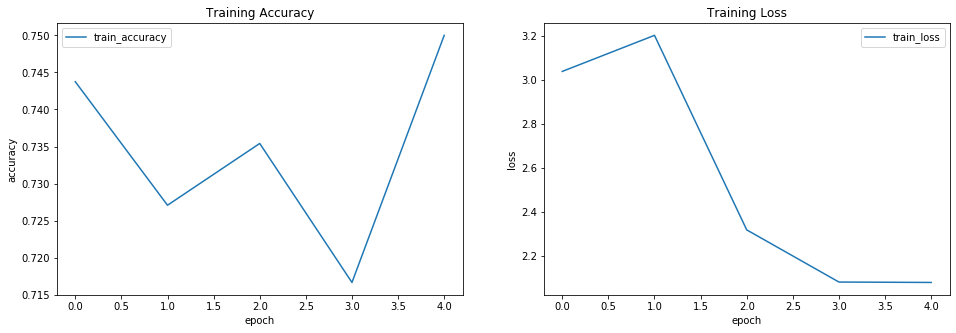

In [25]:
#evaluates model
def model_eval(history):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.title('Training Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy'], loc='best')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss'], loc='best')
    
model_eval(history)

In [32]:
predictions = model.predict(test_generator)
predicted_label = np.argmax(predictions, axis = 1)
print(predictions[:20])

[[1.0000000e+00 2.3286047e-13]
 [1.0000000e+00 2.8098973e-11]
 [1.0000000e+00 4.1994852e-10]
 [1.0000000e+00 8.2991003e-13]
 [1.0000000e+00 8.7363825e-14]
 [1.0000000e+00 5.5209292e-14]
 [1.0000000e+00 1.6639850e-17]
 [1.0000000e+00 1.2422961e-14]
 [1.0000000e+00 7.3407443e-12]
 [1.0000000e+00 2.8555706e-13]
 [9.9712974e-01 2.8702628e-03]
 [1.0000000e+00 6.1095794e-12]
 [1.0000000e+00 6.7390316e-09]
 [1.0000000e+00 7.0225331e-10]
 [1.0000000e+00 8.5777896e-10]
 [1.0000000e+00 6.3064495e-13]
 [1.0000000e+00 2.7542144e-11]
 [1.0000000e+00 6.2951622e-10]
 [1.0000000e+00 3.7759396e-08]
 [1.0000000e+00 5.9672970e-13]]


In [30]:
import numpy as np

class_names = ["Sick", "Not Sick"]

# Utility function to plot image and actual label

def plot_image(i, predictions_array, labels, img):
    prediction = predictions_array[i]
    true_label = int(labels[i])

    # Remove grid, x and y axis ticks from the chart
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Plot the image
    plt.imshow( img[i, :, :, 0], cmap="gray")

    # Set predicted_label to the highest value from the prediction result
    if prediction[0] > prediction[1]:
        predicted_label = 0
    else:
        predicted_label = 1
        predicted_label = int(round(predicted_label))

    # Set color to blue on a correct prediction, otherwise set color to red
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Print the predicted label, confidence number, and actual label
    plt.xlabel("{} ({:2.0f}%) vs {}".format(class_names[predicted_label],
                                100*np.max(prediction),
                                class_names[true_label]),
                                color=color)


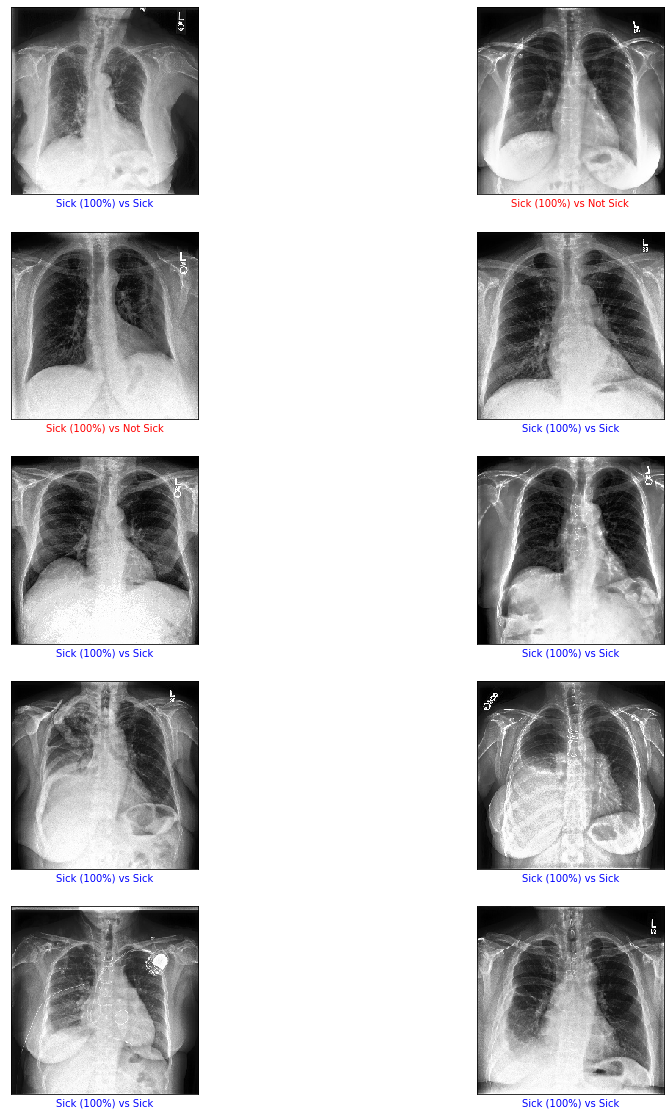

In [31]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(4*2*num_cols, 4*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_generator[0][1], test_generator[0][0])